Task is to 
* Import Resnet18 Model weights - [https://github.com/qubvel/classification_models]
* predict on cifar10 data - [http://www.hackevolve.com/where-cnn-is-looking-grad-cam/]
* Find 50 missclassified images
* Perform gradCAM on these 50 images

Getting necessary libs

In [2]:
!pip install image-classifiers
!pip install git+https://github.com/qubvel/classification_models.git
  
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-r7k30uuf
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-r7k30uuf
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-x8qbuqv1/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


Using TensorFlow backend.


In [0]:
# prepare your data
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [4]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

print (train_labels.shape)

(50000, 10)


In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

Importing ResNet18 model

In [7]:
import keras
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from keras.applications.imagenet_utils import decode_predictions

from classification_models.resnet import ResNet18, preprocess_input

#X = preprocess_input()
#y = 

n_classes = num_classes #10

# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', classes=10, include_top=False)

#Freezing except recent 4 layers from imported model
'''for layer in base_model.layers[:-4]:
    layer.trainable = False'''

x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

# Compile
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#model.fit(train_features, train_labels)

W0710 16:47:36.234385 140488770197376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 16:47:36.257892 140488770197376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 16:47:36.258730 140488770197376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0710 16:47:36.259583 140488770197376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0710 16:47:36.263908 140488

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=97, epochs=10)`
  
W0710 16:47:39.758064 140488770197376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructio

Epoch 1/10
97/97 [==============================] - 27s 280ms/step - loss: 1.7029 - acc: 0.4291 - val_loss: 1.3631 - val_acc: 0.5379
Epoch 2/10
97/97 [==============================] - 20s 211ms/step - loss: 1.1793 - acc: 0.5869 - val_loss: 1.1482 - val_acc: 0.6145
Epoch 3/10
97/97 [==============================] - 20s 204ms/step - loss: 1.0485 - acc: 0.6349 - val_loss: 1.0309 - val_acc: 0.6491
Epoch 4/10
97/97 [==============================] - 20s 204ms/step - loss: 0.9588 - acc: 0.6620 - val_loss: 0.9766 - val_acc: 0.6674
Epoch 5/10
97/97 [==============================] - 20s 205ms/step - loss: 0.9014 - acc: 0.6829 - val_loss: 0.9128 - val_acc: 0.6871
Epoch 6/10
97/97 [==============================] - 20s 205ms/step - loss: 0.8581 - acc: 0.6975 - val_loss: 0.8798 - val_acc: 0.6988
Epoch 7/10
97/97 [==============================] - 20s 206ms/step - loss: 0.8195 - acc: 0.7108 - val_loss: 0.8355 - val_acc: 0.7077
Epoch 8/10
97/97 [==============================] - 20s 204ms/step - 

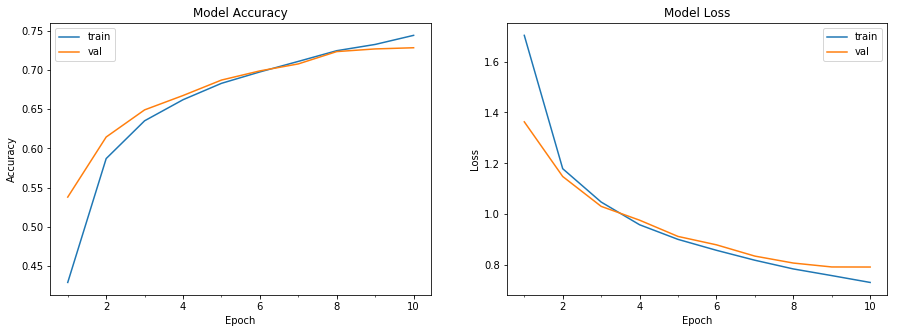

Accuracy on test data is: 72.83


In [8]:
# Train
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        rotation_range=15, width_shift_range=0.1, height_shift_range=0.1)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 512),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 10, 
                                 validation_data = (test_features, test_labels), verbose=1, 
                                 )
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [27]:
# finding missclassifide images
y_preds = model.predict(test_features)

#misclassified = np.where(np.argmax(y_preds) != np.argmax(test_labels))
print (np.argmax(y_preds) != np.argmax(test_labels))

True


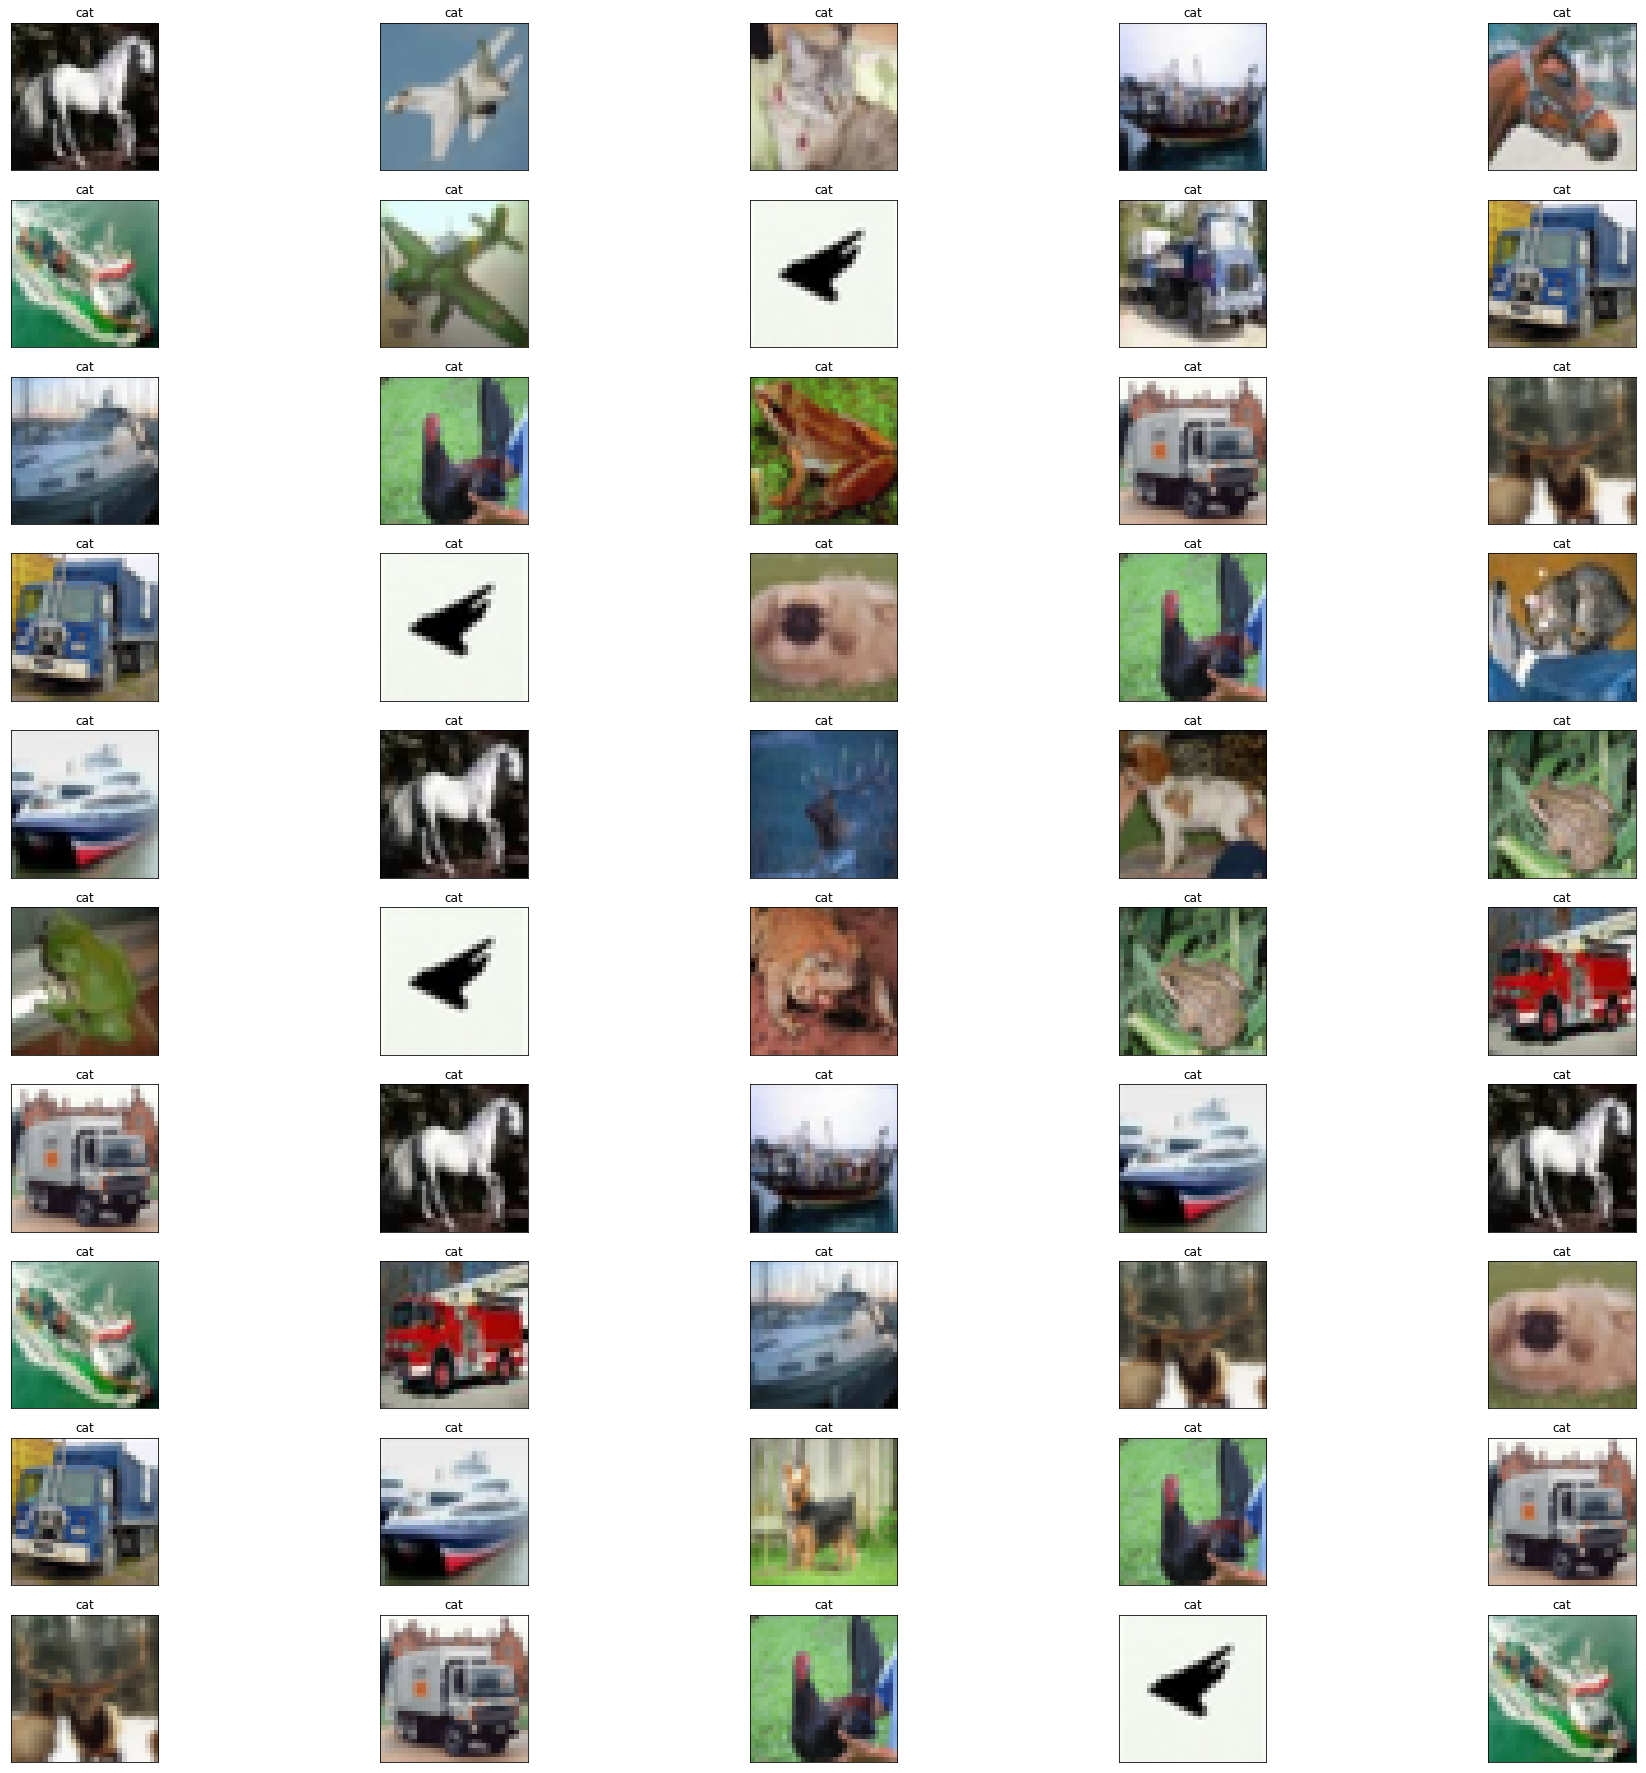

In [29]:
#Showing 50 missclassified images
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(32,32))

for i in range(50):
  ax = fig.add_subplot(10, 5, 1+i, xticks=[], yticks=[])
  idx = np.where(test_features[i])[0]
  #print (test_features[i])
  features_idx = test_features[idx,::]
  img_num = np.random.randint(features_idx.shape[0])
  im = features_idx[img_num]
  ax.set_title(class_names[np.argmax(y_preds[0])])
  plt.imshow(im)
  
plt.show()

In [34]:
print([layer.name for layer in model.layers[0:] if "conv" in layer.name])

['conv0', 'stage1_unit1_conv1', 'stage1_unit1_conv2', 'stage1_unit2_conv1', 'stage1_unit2_conv2', 'stage2_unit1_conv1', 'stage2_unit1_conv2', 'stage2_unit2_conv1', 'stage2_unit2_conv2', 'stage3_unit1_conv1', 'stage3_unit1_conv2', 'stage3_unit2_conv1', 'stage3_unit2_conv2', 'stage4_unit1_conv1', 'stage4_unit1_conv2', 'stage4_unit2_conv1', 'stage4_unit2_conv2']


*Grad cam for all missclassified images for layer stage3_unit2_conv2*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


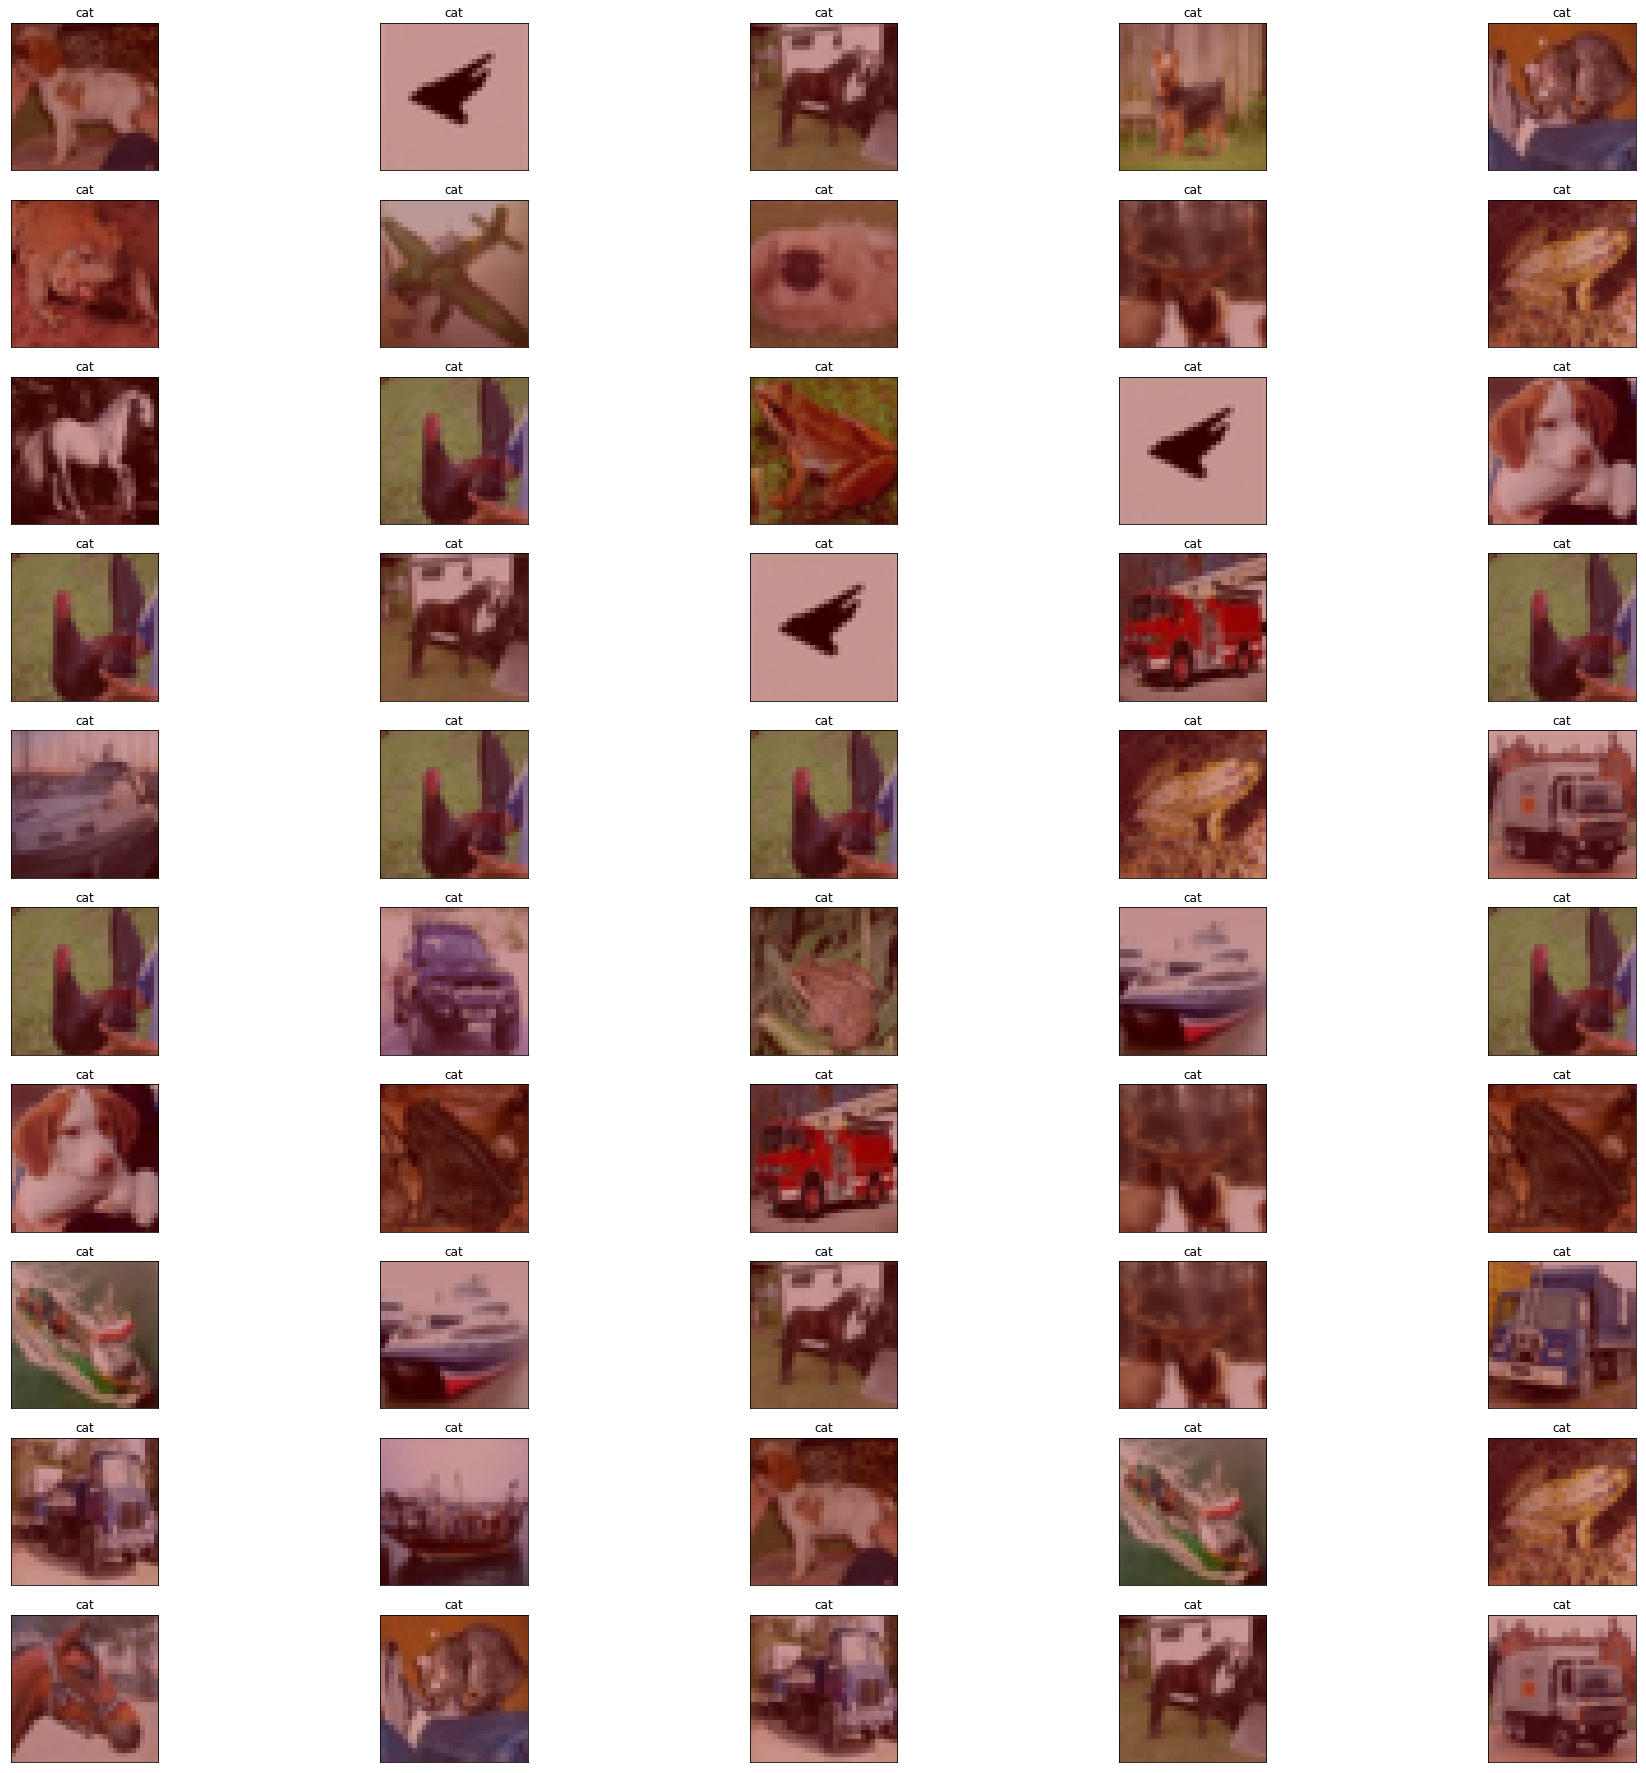

In [39]:
# Importing necessary Packages for Grad Cam
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

fig = plt.figure(figsize=(32,32))

for i in range(50):
  ax = fig.add_subplot(10, 5, 1+i, xticks=[], yticks=[])
  idx = np.where(test_features[i])[0]
  #print (test_features[i])
  features_idx = test_features[idx,::]
  img_num = np.random.randint(features_idx.shape[0])
  im = features_idx[img_num]
  ax.set_title(class_names[np.argmax(y_preds[0])])
  
  # Loading/Preparing images for gradCAM execution
  x = image.img_to_array(im)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  
  #last convolution layer for current model is  
  last_conv_layer = model.get_layer("stage3_unit2_conv2") 
    
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  #print (grads)
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
    
  heatmap = cv2.resize(heatmap, (im.shape[1], im.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  superimposed_img = cv2.addWeighted(im, 0.6, heatmap, 0.4, 0)
  plt.imshow(superimposed_img)
plt.show()

*Grad cam for all missclassified images for layer stage3_unit2_conv1*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


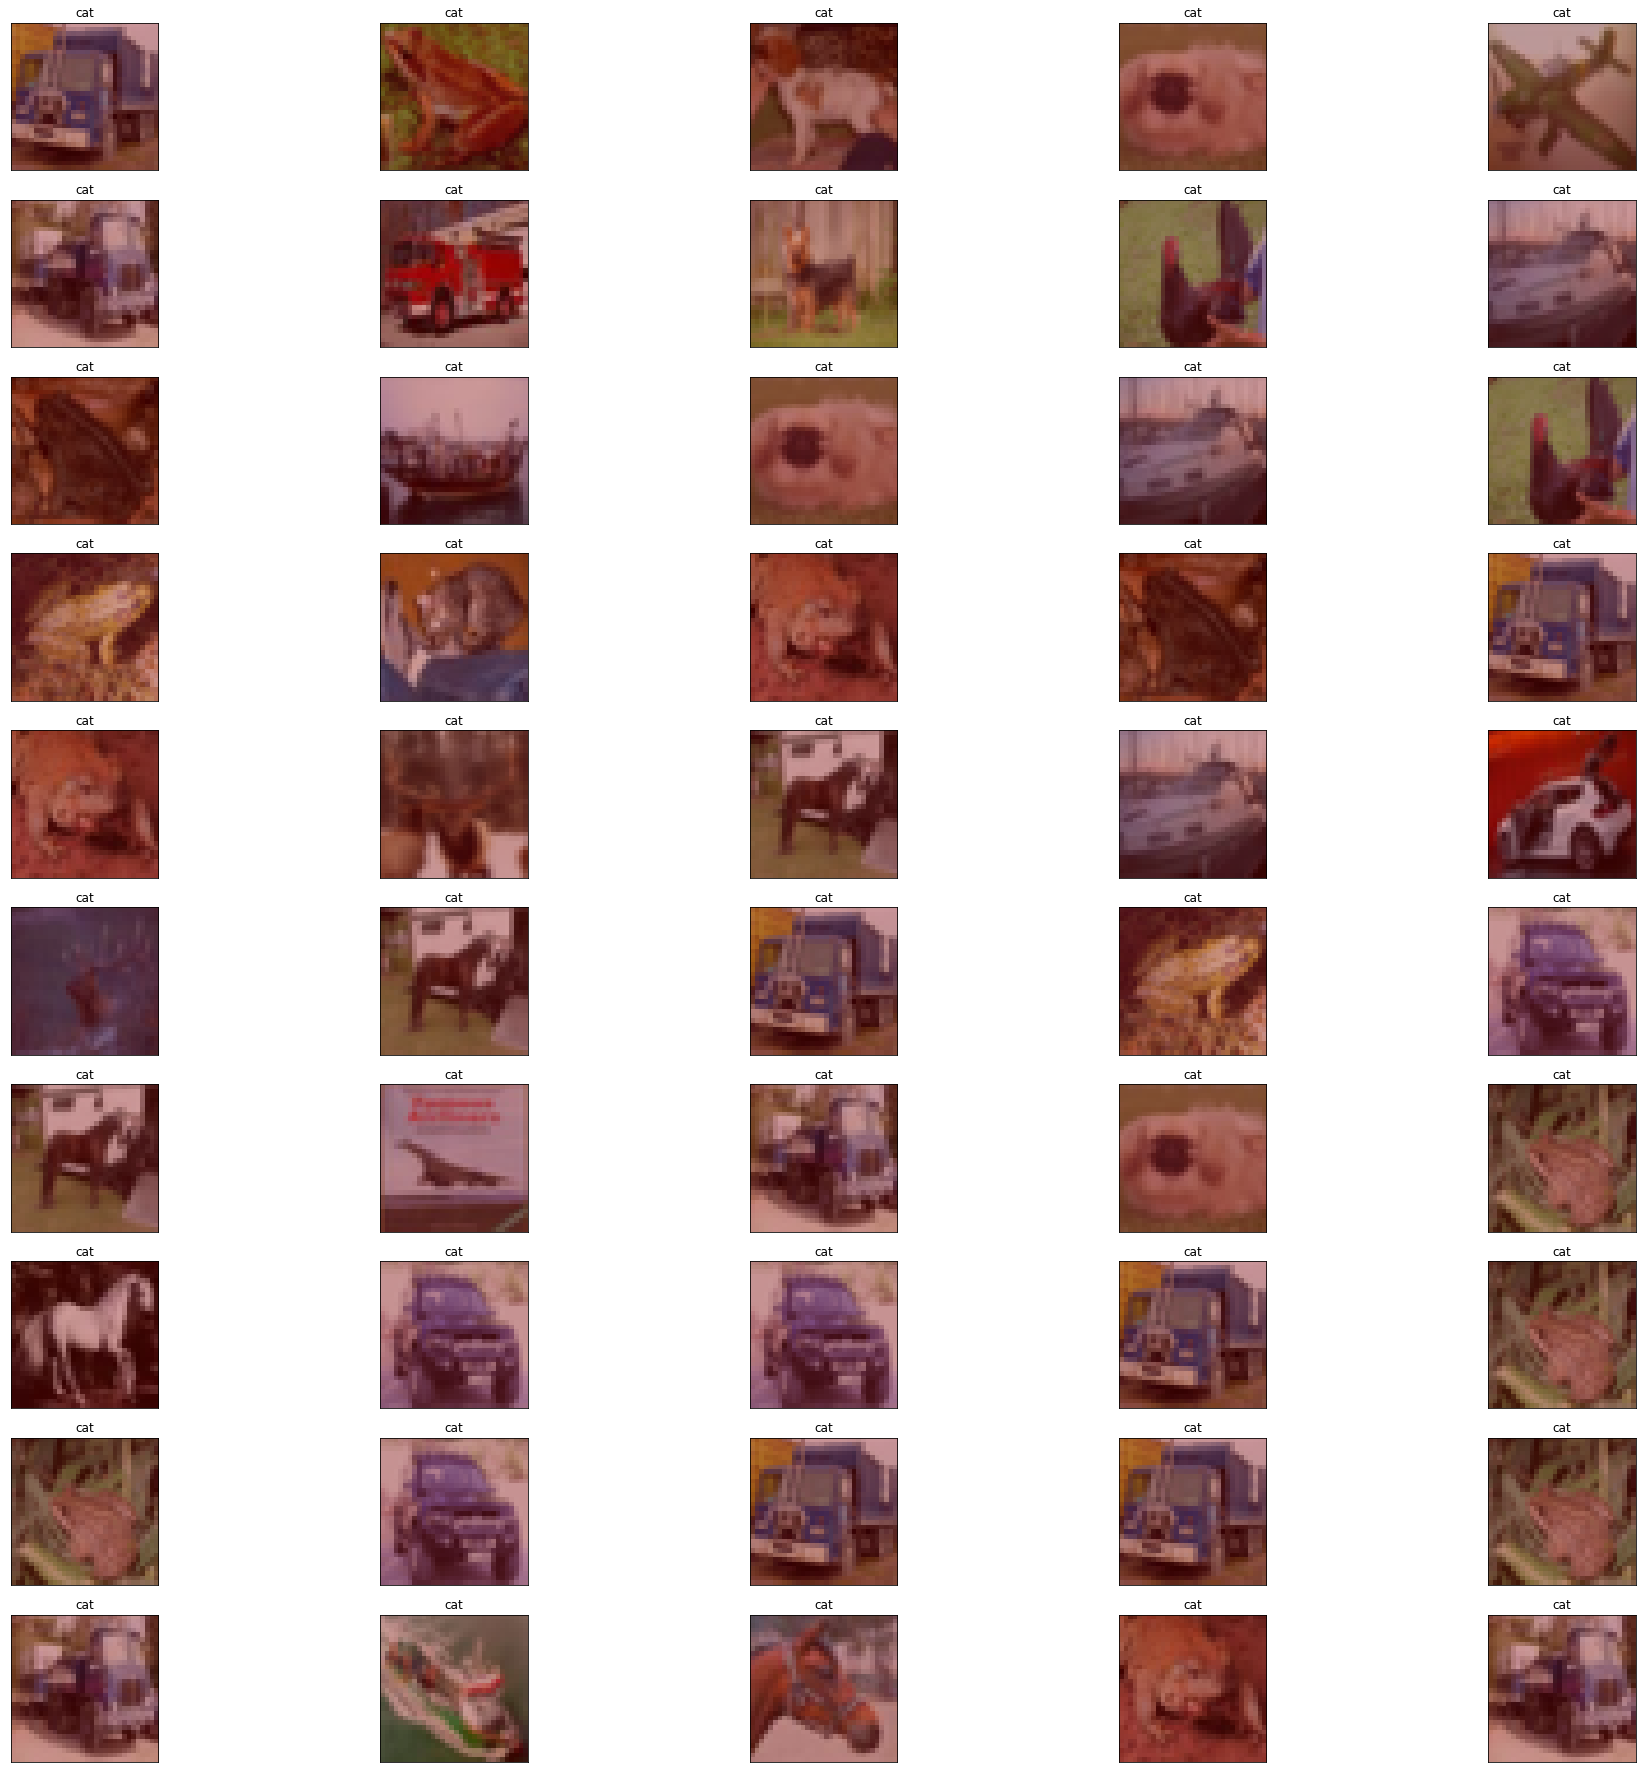

In [41]:
#stage3_unit2_conv1

fig = plt.figure(figsize=(32,32))

for i in range(50):
  ax = fig.add_subplot(10, 5, 1+i, xticks=[], yticks=[])
  idx = np.where(test_features[i])[0]
  #print (test_features[i])
  features_idx = test_features[idx,::]
  img_num = np.random.randint(features_idx.shape[0])
  im = features_idx[img_num]
  ax.set_title(class_names[np.argmax(y_preds[0])])
  
  # Loading/Preparing images for gradCAM execution
  x = image.img_to_array(im)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  
  #last convolution layer for current model is  
  last_conv_layer = model.get_layer("stage3_unit2_conv1") 
    
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  #print (grads)
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
    
  heatmap = cv2.resize(heatmap, (im.shape[1], im.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  superimposed_img = cv2.addWeighted(im, 0.6, heatmap, 0.4, 0)
  plt.imshow(superimposed_img)
plt.show()

*Grad cam for all missclassified images for layer stage2_unit2_conv2*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


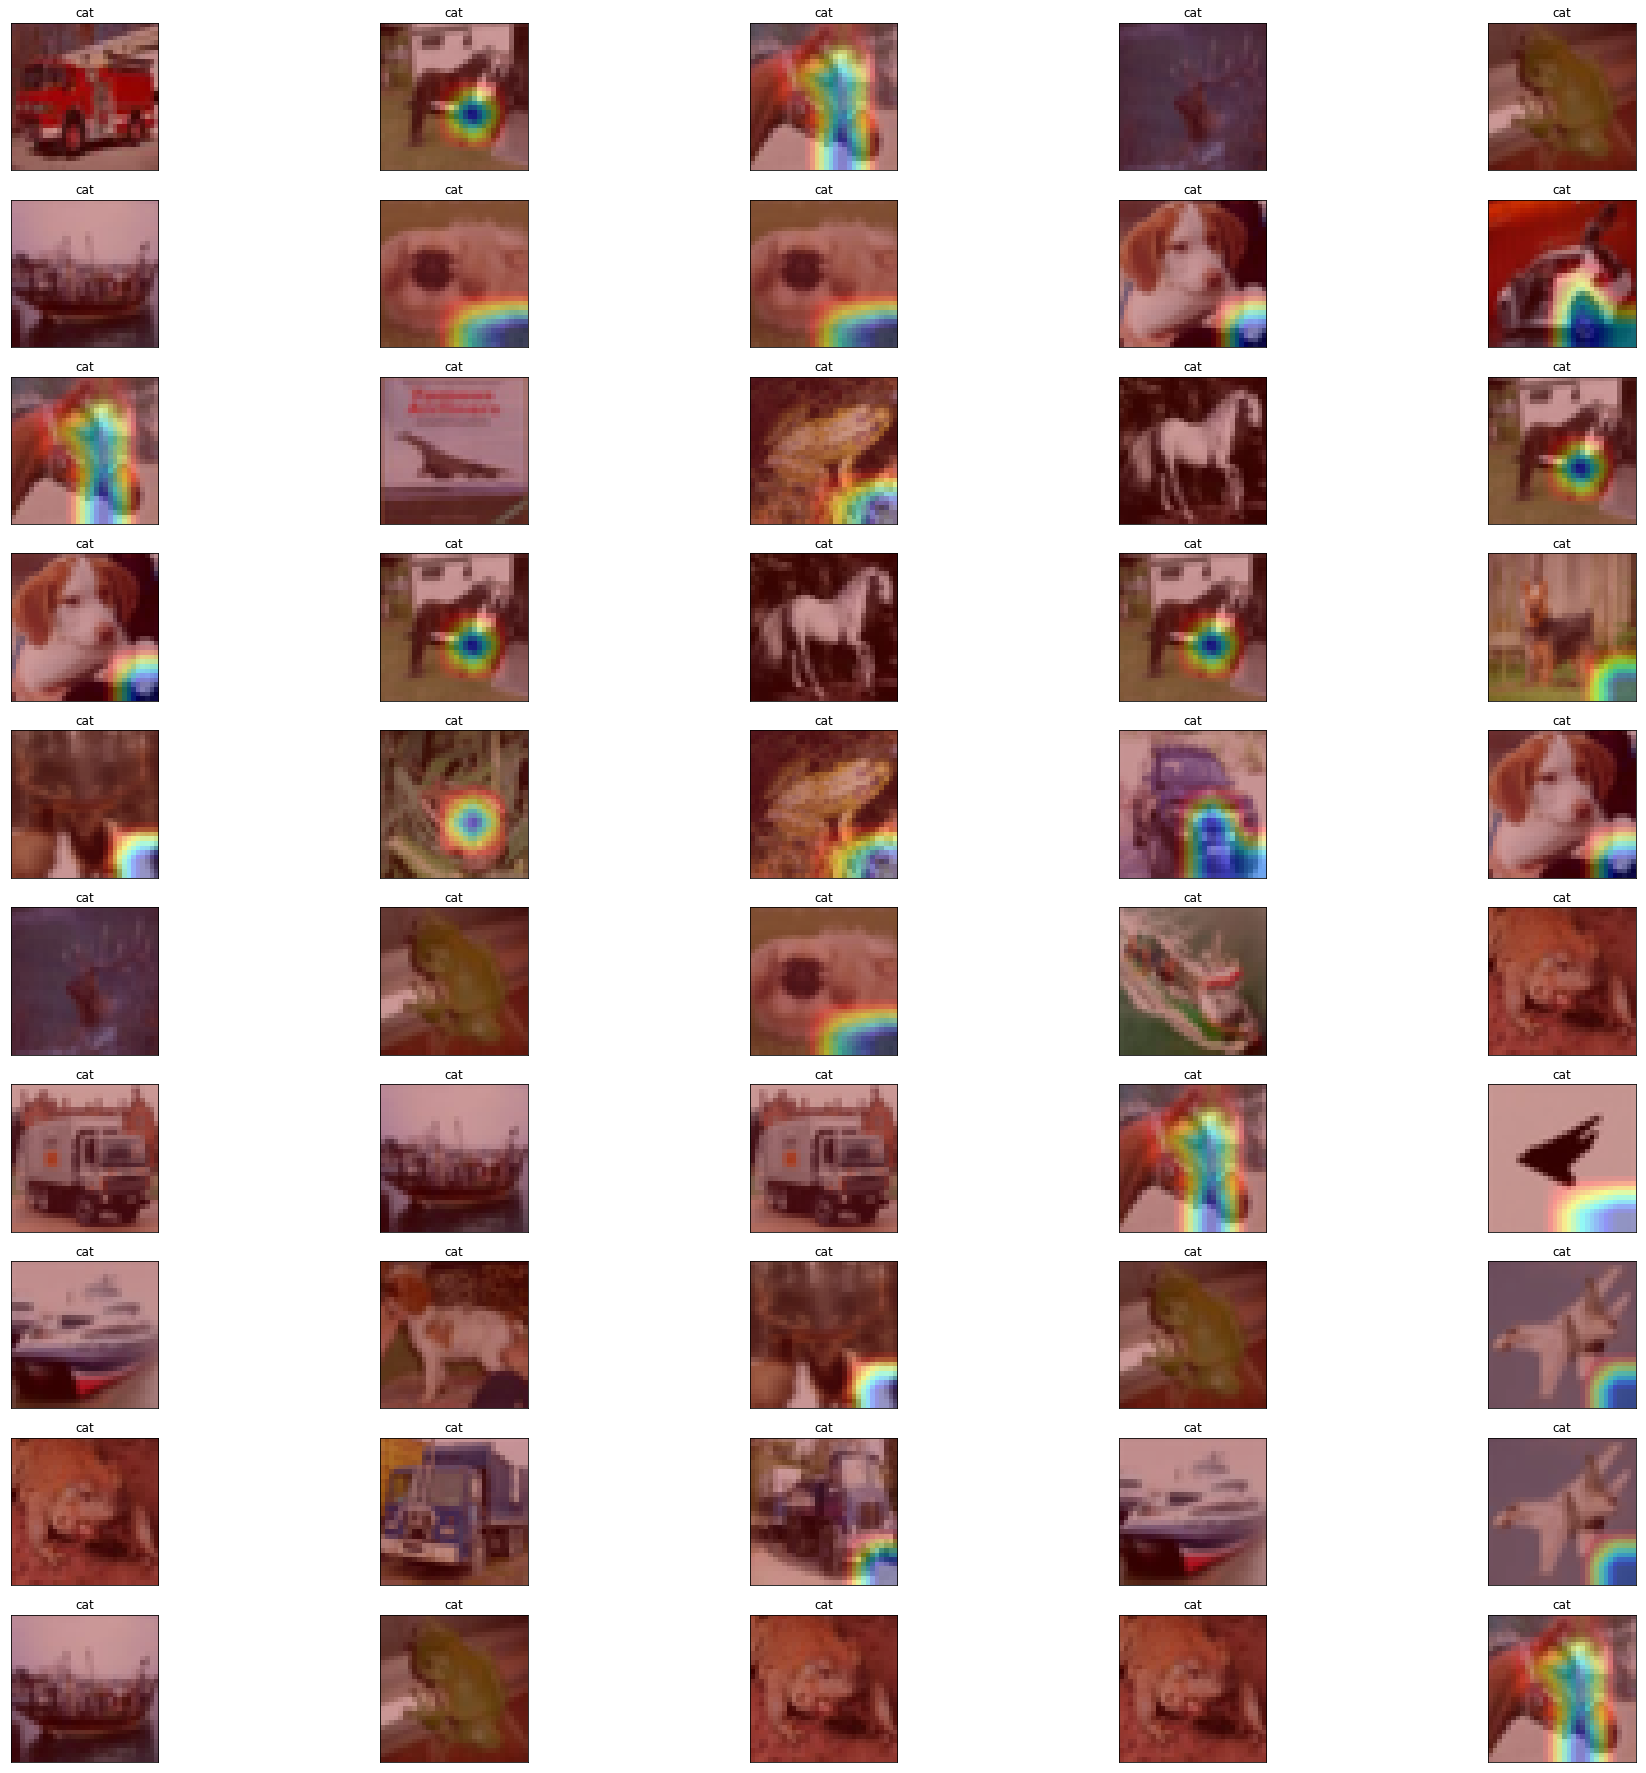

In [40]:

fig = plt.figure(figsize=(32,32))

for i in range(50):
  ax = fig.add_subplot(10, 5, 1+i, xticks=[], yticks=[])
  idx = np.where(test_features[i])[0]
  #print (test_features[i])
  features_idx = test_features[idx,::]
  img_num = np.random.randint(features_idx.shape[0])
  im = features_idx[img_num]
  ax.set_title(class_names[np.argmax(y_preds[0])])
  
  # Loading/Preparing images for gradCAM execution
  x = image.img_to_array(im)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  
  #last convolution layer for current model is  
  last_conv_layer = model.get_layer("stage2_unit2_conv2") 
    
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  #print (grads)
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
    
  heatmap = cv2.resize(heatmap, (im.shape[1], im.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  superimposed_img = cv2.addWeighted(im, 0.6, heatmap, 0.4, 0)
  plt.imshow(superimposed_img)
plt.show()